# Convolutional Neural Networks Lab

## Objective

In this lab, we'll learn and implement best practices for structuring a Deep Learning/Computer Vision project.  We'll then use design and train a Convolutional Neural Network to classify if an image contains Santa!

## 1. Properly store your images

When you're analyzing your image data, file management is important. We will be using the santa images again, but this time, they are just stored in two folders: `santa` and `not_santa`, under. We want to work with a `train`, `validation` and `test` data set now, as we know by now that this is the best way to go. 

Let's import libraries `os` and `shutil`, as we'll need them to create the new folders and move the new files in there.  Import these modules in the cell below. 

In [2]:
import os
import shutil

Create three objects representing the existing directories 'data/santa/' as `data_santa_dir` and 'data/not_santa/' as `data_not_santa_dir`. We will create a new directory 'split/' as `new_dir`, where we will split the data set in three groups (or three subdirectories) 'train', 'test' and 'validation', each containing `santa` and `not_santa` subfolders. The final desired structure is represented below:

![title](folder_structure.png)

In [7]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'

You can use `os.listdir()` to create an object that stores all the relevant image names. 

Run the cell below to have create a list comprehension that reads and stores all filenames that end with `.jpg` inside of the `data_santa_dir` directory we stored earlier.

In [8]:
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

Let's inspect the first 10 to see if it worked correctly.

In [9]:
imgs_santa[0:10]

['00000428.jpg',
 '00000400.jpg',
 '00000366.jpg',
 '00000372.jpg',
 '00000414.jpg',
 '00000399.jpg',
 '00000158.jpg',
 '00000164.jpg',
 '00000170.jpg',
 '00000038.jpg']

Let's see how many images there are in the 'santa' directory.  Complete the following print statement to determine how many total images are in this directory. 

In [11]:
print('There are',len(imgs_santa), 'santa images')

There are 461 santa images


Now, repeat the process we did above, but for the `not_santa` directory.  Write the appropriate list comprehension below to create an array containing all the filenames contained within the `not_santa` directory.

In [12]:
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]

In [14]:
print('There are', len(imgs_not_santa), 'images without santa')

There are 461 images without santa


Create all the folders and subfolder in order to get the structure represented above. You can use `os.path.join` to create strings that will be used later on to generate new directories.

In the cell below, create the `'split'` directory we'll need by calling `os.mkdir()` on the `new_dir` variable we created above. 

In [15]:
os.mkdir(new_dir)

Now, run the cell below to join all the paths as needed.  Pay special attention to what we're doing at this step, and try to figure out what each path will contain.  If you're not sure, inspect them!

In [16]:
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')

Display the path for `train_santa` in the cell below.  Does this match with the path you thought it created?

In [17]:
train_santa

'split/train/santa'

Now use all the path strings you created to make new directories. You can use `os.mkdir()` to do this. Go have a look at your directory and see if this worked!

In the cell below, call `os.mkdir()` on every path we created in the cell above. 

In [18]:
os.mkdir(test_folder)
os.mkdir(test_santa)
os.mkdir(test_not_santa)

os.mkdir(train_folder)
os.mkdir(train_santa)
os.mkdir(train_not_santa)

os.mkdir(val_folder)
os.mkdir(val_santa)
os.mkdir(val_not_santa)

Copy the Santa images in the three santa subfolders. Let's put the first 271 images in the training set, the next 100 images in the validation set and the final 90 images in the test set.

The code for moving the images into the training set has been provided for you.  Use this as a reference to complete the validation santa and test santa cells!

In [19]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [20]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [21]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

Now, repeat all this for the 'not_santa' images!

In [22]:
# train not_santa
imgs = imgs_not_santa[:271]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(train_not_santa, img)
    shutil.copyfile(origin, destination)
# validation not_santa
imgs = imgs_not_santa[271:371]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(val_not_santa, img)
    shutil.copyfile(origin, destination)
# test not_santa
imgs = imgs_not_santa[371:]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(test_not_santa, img)
    shutil.copyfile(origin, destination)

Let's print out how many images we have in each directory so we know for sure our numbers are right!  Complete each of the following print statements to examine how many images we have in each subdirectory.  

In [26]:
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')
# Expected Output: There are 271 santa images in the training set

There are 271 santa images in the training set


In [27]:
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')
# Expected Output: There are 100 santa images in the validation set

There are 100 santa images in the validation set


In [28]:
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')
# Expected Output: There are 90 santa images in the test set

There are 90 santa images in the test set


In [29]:
print('There are', len(os.listdir(train_santa)), 'images without santa in the train set')
# Expected Output: There are 271 images without santa in the train set

There are 271 images without santa in the train set


In [30]:
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')
# Expected Output: There are 100 images without santa in the validation set

There are 100 images without santa in the validation set


In [31]:
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')
# Expected Output: There are 90 images without santa in the test set

There are 90 images without santa in the test set


## Data Preprocessing

We'll make use of the image preprocessing functionality found in keras to reshape our data as needed.  

Now that we've sorted our data, we can easily use Keras' module with image-processing tools. Let's import the necessary libraries below. Run the cell below to import everything we'll need. 

In [32]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Now, complete the image generator code in the cell below.  The code for test generator has been completed for you--use this as a reference to complete the `val_generator` and `train_generator` objects.  Keep the parameters the same across all 3 of them, so that there won't be any discrepancies between how the images look in each directory. 

(**_NOTE:_** The directory path referenced will depend on which set it is targeting, and the `batch_size` parameter will correspond to the number of images in the corresponding set, so these parameters will depend on if it referencing test, val, or train!)

In [33]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 180 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 542 images belonging to 2 classes.


Now, in the cell below, separate out the images and labels by calling `next()` on the appropriate generators.  The first one has been completed for you.  

In [34]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Now, run the cell below to get summary statistics on the current shape of our data.

In [35]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


If these numbers look confusing, don't sweat it--these are **_Tensors_**.  A tensor is an n-dimensional array.  Take a look at the the shape of `train_images`:  
<br>  
<center>`(542, 64, 64, 3)`</center>

In plain English, we would read this as "`train_images` contains 542 images.  These images are 64 pixels wide, 64 pixels high, and have 3 color channels, meaning that these are color images".  

Since we'll be using a Multi-Layer Perceptron as our baseline, that means we'll need to create a version of our data that is reshaped from tensors to vectors. 

In the cell below, complete the code to reshape our images.  The first one has been provided for you. 

In [36]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape) # Expected Output: (542, 12288)
print(test_img.shape) # Expected Output: (180, 12288)
print(val_img.shape) # Expected Output: (200, 12288)

(542, 12288)
(180, 12288)
(200, 12288)


We also need to rehape our labels accordingly.  In the cell below, complete the code to reshape our labels. The first one has been provided for you.  

**_Hint:_** Pay attention to the dimensionality in the 2nd parameter inside the `.reshape` call--it should align with the number of items contained in that set!

In [37]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

### Building our Baseline MLP

Since we want to see what kind of performance gains a CNN gives us a basic MLP, that means we'll need to build and train a basic MLP first!

In the cell below, build and train an MLP with the following specifications:

* Import whatever you'll need to build the network from keras
* `input_shape=(12288,)` (remember to declare this when creating the first hidden layer)
* Hidden Layer 1: 20 neurons, relu activation
* Hidden Layer 2: 7 neurons, relu activation
* Hideen Layer 3: 5 neurons, relu activation
* Output layer: 1 neuron, sigmoid activation

In [38]:
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) #2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now, compile the model with the following hyperparameters:

* `'adam'` optimizer
* `'binary_crossentropy'` for loss
* set metrics to `['accuracy']`

In [39]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Now, fit the model.  In addition to passing in our training data and labels, also set epochs to `50`, batch size to `32`, and pass in our validation data as well. 

In [40]:
mlp_history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/50
542/542 [==============================] - 2s 3ms/step - loss: 0.6971 - acc: 0.5221 - val_loss: 0.6780 - val_acc: 0.5100
Epoch 2/50
542/542 [==============================] - 1s 1ms/step - loss: 0.6809 - acc: 0.5185 - val_loss: 0.6618 - val_acc: 0.5350
Epoch 3/50
542/542 [==============================] - 1s 1ms/step - loss: 0.6725 - acc: 0.5203 - val_loss: 0.6475 - val_acc: 0.5950
Epoch 4/50
542/542 [==============================] - 1s 1ms/step - loss: 0.6493 - acc: 0.5886 - val_loss: 0.6236 - val_acc: 0.5950
Epoch 5/50
542/542 [==============================] - 1s 1ms/step - loss: 0.6331 - acc: 0.6218 - val_loss: 0.6360 - val_acc: 0.4950
Epoch 6/50
542/542 [==============================] - 1s 1ms/step - loss: 0.6060 - acc: 0.6716 - val_loss: 0.6576 - val_acc: 0.4950
Epoch 7/50
542/542 [==============================] - 1s 1ms/step - loss: 0.5870 - acc: 0.6790 - val_loss: 0.7971 - val_acc: 0.5750
Epoch 8/50
542/542 [==========

Now, get our final training and testing results using `model.evaluate` and passing in the appropriate set of data/labels in the cells below. 

In [41]:
results_train = model.evaluate(train_img, train_y)

542/542 [==============================] - 0s 649us/step


In [42]:
results_test = model.evaluate(test_img, test_y)

180/180 [==============================] - 0s 679us/step


In [43]:
results_train

[0.10446896681706404, 0.9760147601476015]

In [44]:
results_test

[0.3973882410261366, 0.8555555529064602]

Finally, let's plot our accuracy and our loss.

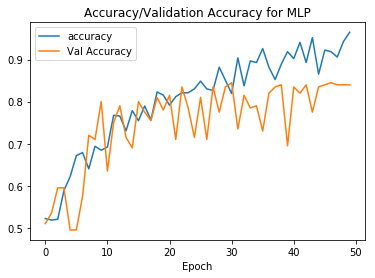

In [45]:
history = mlp_history.history

plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy/Validation Accuracy for MLP')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'Val Accuracy'])
plt.show()

Our model is currently "thrashing"--it has not yet converged at the right values, and is extremely sensitive to noise. 

Remember that, in our lab on "building deeper neural networks from scratch, we got to a train set prediction was 95%, and a test set prediction of 74.23%.  

This result is similar to what we got building our manual "deeper" dense model. The results are not entirely different. This is not a surprise! We should note that there were some differences in our manual approach and int then model we just built:
- Before, we only had a training and a validation set (which was at the same time the test set). Now we have split up the data 3-ways.
- We didn't use minibatches before, yet we used mini-batches of 32 units here.


# 3. Convnet

Now, we'll build a Convolutional Neural Network to see how it measures up. 

In the cell below, create a CNN with the following specifications:

* an `input_shape` of `(64, 64, 3)` (still declare this during the creating of the first hidden layer)
* Layer 1: Conv2D, 32 filters, filter size `(3,3)`, `relu` activation
* Layer 2: MaxPooling2D, shape `(2,2)`
* Layer 3:  Conv2D, 32 filters, filter size `(4, 4)`, `relu` activation
* Layer 4: MaxPooling2D, shape `(2,2)`
* Layer 5: Conv2D, 64 filters, filter size `(3,3)`, `relu` activation
* Layer 6: a `Flatten()` layer
* Layer 7: Dense layer, 64 neurons, `relu` activation
* Layer 8: Output layer, 1 neuron, `sigmoid` activation

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



Now, compile the model with the same parameters we used for our MLP above in the cell below.

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

Finally, fit the model.  In addition to our training images and labels, set epochs to `30`, batch size to `32`, and also pass in our validation data.

In [48]:
cnn_history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/30
542/542 [==============================] - 41s 76ms/step - loss: 0.6837 - acc: 0.5240 - val_loss: 0.6723 - val_acc: 0.5000
Epoch 2/30
542/542 [==============================] - 42s 77ms/step - loss: 0.6738 - acc: 0.5000 - val_loss: 0.6650 - val_acc: 0.5000
Epoch 3/30
542/542 [==============================] - 42s 78ms/step - loss: 0.6668 - acc: 0.5000 - val_loss: 0.6573 - val_acc: 0.5000
Epoch 4/30
542/542 [==============================] - 39s 73ms/step - loss: 0.6601 - acc: 0.5074 - val_loss: 0.6490 - val_acc: 0.5400
Epoch 5/30
542/542 [==============================] - 41s 75ms/step - loss: 0.6492 - acc: 0.5517 - val_loss: 0.6380 - val_acc: 0.6050
Epoch 6/30
542/542 [==============================] - 41s 76ms/step - loss: 0.6377 - acc: 0.6181 - val_loss: 0.6232 - val_acc: 0.6600
Epoch 7/30
542/542 [==============================] - 42s 78ms/step - loss: 0.6228 - acc: 0.6661 - val_loss: 0.6042 - val_acc: 0.6600
Epoch 8/30
542/5

Now, let's get the final results for our training and testing sets by calling `model.evaluate` and passing in the appropriate sets. 

In [49]:
results_train = model.evaluate(train_images, train_y)

542/542 [==============================] - 11s 21ms/step


In [50]:
results_test = model.evaluate(test_images, test_y)

180/180 [==============================] - 4s 21ms/step


In [51]:
results_train

[0.24373030926468628, 0.9243542437623787]

In [52]:
results_test

[0.30997015966309444, 0.9055555529064603]

Let's plot the accuracy of our CNN results in the cell below, as we did for our MLP.

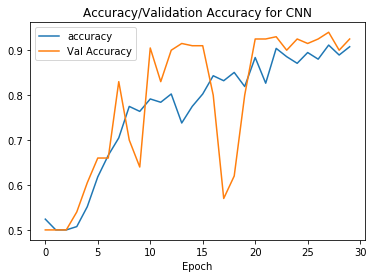

In [53]:
history = cnn_history.history

plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy/Validation Accuracy for CNN')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'Val Accuracy'])
plt.show()

#### Interpreting Our Results

Our model is still thrashing a bit, but the overall performance is much higher.  More importantly, it doesn't seem as if the model has overfit, whereas there was definitely evidence of overfitting when looking at the results from our MLP. 

To end this lab, we'll get some practice with Data Augmentation. This is a very useful trick for generating more data, while also stopping the model from overfitting on certain quirks found in the images!

# Data augmentation

ImageDataGenerator becomes really useful when we *actually* want to generate more data. We'll show you how this works.

This generator takes in a range of parameters we can set to tell it exactly how we want to to modify the images it receives.  The original image will be left alone, and copies will be made according to these specifications, resulting in images that are slightly different, which we can add to our training and testing sets. 

Run the cell below to create a data generator.  

In [54]:
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.1,
     horizontal_flip = True)

Now, we'll need to actually use the generator to generated augmented data. Run the cell below.

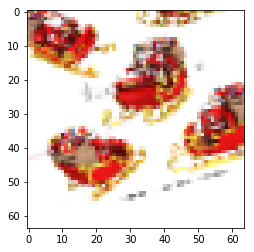

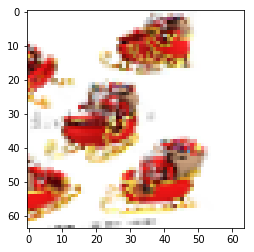

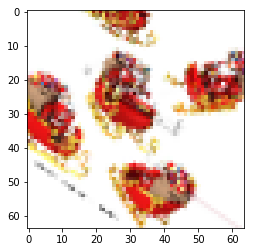

In [55]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

Finally, we'll need to rescale everything as we did in the original data. Run the cell below to do this.  

In [56]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 180 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 542 images belonging to 2 classes.


Now, in the cell below, recreate the CNN model we did above.  Compile the model with the same specifications.  

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

Finally, we'll need to fit the model.  This time, instead of passing in an array of data, we'll pass in the `train_generator` object we created! 

In addition to passing in `train_generator`, pass in the following parameters:

* `steps_per_epoch=25`
* `epochs=30`
* `validation_data=val_generator`
* `validation_steps=25`

In [58]:
history_2 = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=30,
      validation_data=val_generator,
      validation_steps=25)

Epoch 1/30
25/25 [==============================] - 65s 3s/step - loss: 0.6851 - acc: 0.5026 - val_loss: 0.6772 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 64s 3s/step - loss: 0.6784 - acc: 0.5000 - val_loss: 0.6707 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 67s 3s/step - loss: 0.6771 - acc: 0.4902 - val_loss: 0.6645 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 59s 2s/step - loss: 0.6653 - acc: 0.5112 - val_loss: 0.6564 - val_acc: 0.5100
Epoch 5/30
25/25 [==============================] - 69s 3s/step - loss: 0.6585 - acc: 0.5139 - val_loss: 0.6455 - val_acc: 0.5150
Epoch 6/30
25/25 [==============================] - 66s 3s/step - loss: 0.6527 - acc: 0.5484 - val_loss: 0.6355 - val_acc: 0.5150
Epoch 7/30
25/25 [==============================] - 69s 3s/step - loss: 0.6400 - acc: 0.5696 - val_loss: 0.6153 - val_acc: 0.5400
Epoch 8/30
25/25 [==============================] - 66s 3s/step - loss: 0.6265 - acc: 0.65

Now, run the cell below to create a test set and labels we can use for checking the performance with `model.evaluate()`

In [59]:
test_x, test_y = next(test_generator)

Now, run call `model.evaluate()` on the test set we just created, and then examine to see our testing loss and testing accuracy.  

In [60]:
results_test = model.evaluate(test_x, test_y)


180/180 [==============================] - 4s 20ms/step


In [61]:
results_test

[0.3787419252925449, 0.8888888888888888]

Finally, let's visualize the results.  

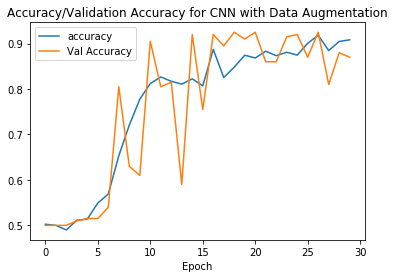

In [62]:
history = history_2.history

plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy/Validation Accuracy for CNN with Data Augmentation') 
plt.xlabel('Epoch')
plt.legend(['accuracy', 'Val Accuracy'])
plt.show()

Interesting results! Our model still seems to be thrashing a bit, but a little less so than before.  It's also worth noting that model performance took a dive in the last epoch or 2, but before the dive, was generally about as well as it was without data augmentation.  